In [1]:
import os, datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv('datasets/life_expectancy.csv')

data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2433,Spain,2007,Developed,89.0,72.0,2,11.05,510.932701,96.0,267,...,96.0,8.36,96.0,0.1,3279.41400,4522683.0,0.6,0.5,0.849,16.0
697,Czechia,2007,Developed,76.8,17.0,0,13.43,0.000000,99.0,2,...,99.0,6.52,99.0,0.1,NaN,NaN,2.0,2.1,NaN,NaN
1852,New Zealand,2008,Developed,81.0,75.0,0,9.49,6761.288966,9.0,0,...,89.0,1.70,89.0,0.1,31287.77865,NaN,0.3,0.3,0.894,19.5
2215,Samoa,2000,Developing,72.0,18.0,0,3.00,21.254300,89.0,0,...,94.0,5.31,95.0,0.1,154.68923,17461.0,0.2,0.2,0.640,12.1
967,Gambia,2010,Developing,59.3,284.0,3,3.48,0.000000,97.0,2,...,97.0,5.75,97.0,2.1,NaN,NaN,8.2,8.1,0.439,8.8


In [4]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
countries = data['Country'].unique()

na_cols = data.columns[data.isna().any()].tolist()

for col in na_cols:
    for country in countries:
        data.loc[data['Country'] == country, col] = data.loc[data['Country'] == country, col]\
                                                         .fillna(data[data['Country'] == country][col].mean())

In [6]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
data = data.dropna()

data.shape

(2128, 22)

In [8]:
data['Status'].value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

In [9]:
data['Country'].value_counts()

Austria            16
Burundi            16
Belgium            16
Iraq               16
Brazil             16
                   ..
Mali               16
Solomon Islands    16
Kazakhstan         16
Uganda             16
Lebanon            16
Name: Country, Length: 133, dtype: int64

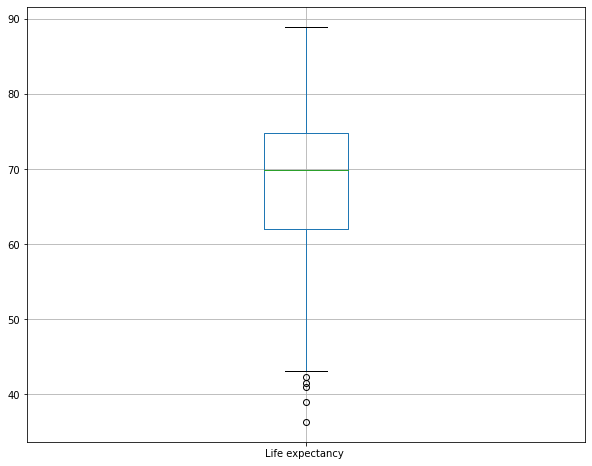

In [10]:
plt.figure(figsize=(10, 8))

data.boxplot('Life expectancy ')

plt.show()

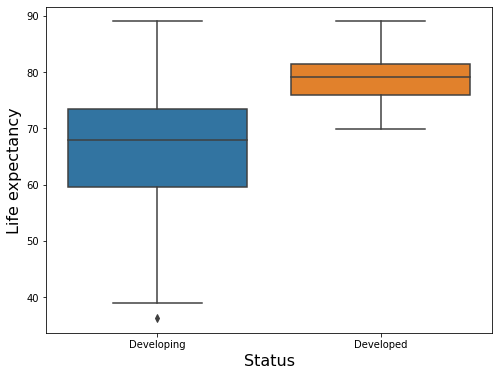

In [11]:
plt.figure(figsize=(8, 6))

sns.boxplot('Status', 'Life expectancy ', data=data)

plt.xlabel('Status', fontsize=16)
plt.ylabel('Life expectancy', fontsize=16)

plt.show()

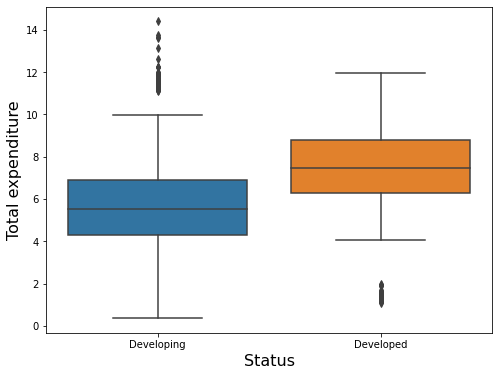

In [12]:
plt.figure(figsize=(8, 6))

sns.boxplot('Status', 'Total expenditure', data=data)

plt.xlabel('Status', fontsize=16)
plt.ylabel('Total expenditure', fontsize=16)

plt.show()

In [13]:
data_corr = data[['Life expectancy ',
                  'Adult Mortality',
                  'Schooling',
                  'Total expenditure',
                  'Diphtheria ',
                  'GDP',
                  'Population']].corr()

data_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.746619,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.408661,-0.097938,-0.212157,-0.259500,-0.021050
Schooling,0.746619,-0.408661,1.000000,0.261679,0.432891,0.471767,-0.022453
Total expenditure,0.203689,-0.097938,0.261679,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.432891,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.471767,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.022453,-0.079752,-0.024167,-0.016800,1.000000


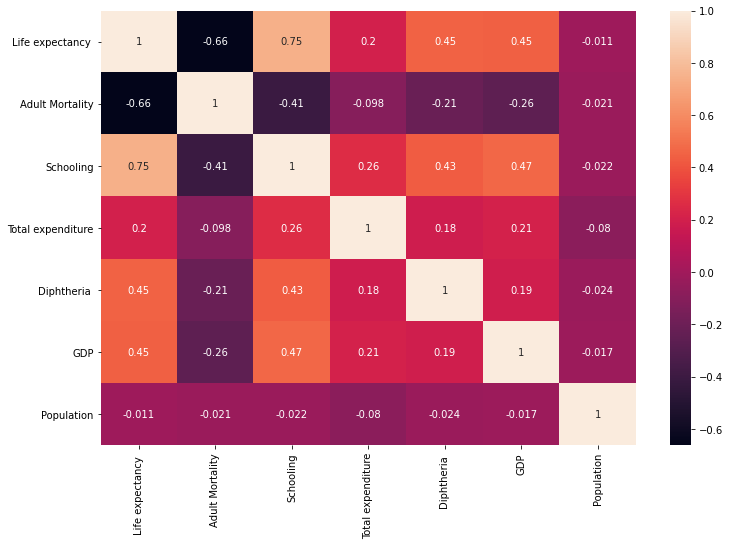

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(data_corr, annot=True)

plt.show()

In [15]:
features = data.drop('Life expectancy ', axis=1)

target = data[['Life expectancy ']]

In [16]:
features.columns

Index([&#39;Country&#39;, &#39;Year&#39;, &#39;Status&#39;, &#39;Adult Mortality&#39;, &#39;infant deaths&#39;,
       &#39;Alcohol&#39;, &#39;percentage expenditure&#39;, &#39;Hepatitis B&#39;, &#39;Measles &#39;, &#39; BMI &#39;,
       &#39;under-five deaths &#39;, &#39;Polio&#39;, &#39;Total expenditure&#39;, &#39;Diphtheria &#39;,
       &#39; HIV/AIDS&#39;, &#39;GDP&#39;, &#39;Population&#39;, &#39; thinness  1-19 years&#39;,
       &#39; thinness 5-9 years&#39;, &#39;Income composition of resources&#39;, &#39;Schooling&#39;],
      dtype=&#39;object&#39;)

In [17]:
target.sample(5)

,Life expectancy
984,73.2
781,69.3
1031,83.0
1244,66.8
1099,54.4


In [18]:
features = features.drop('Country', axis = 1)

features.columns

Index([&#39;Year&#39;, &#39;Status&#39;, &#39;Adult Mortality&#39;, &#39;infant deaths&#39;, &#39;Alcohol&#39;,
       &#39;percentage expenditure&#39;, &#39;Hepatitis B&#39;, &#39;Measles &#39;, &#39; BMI &#39;,
       &#39;under-five deaths &#39;, &#39;Polio&#39;, &#39;Total expenditure&#39;, &#39;Diphtheria &#39;,
       &#39; HIV/AIDS&#39;, &#39;GDP&#39;, &#39;Population&#39;, &#39; thinness  1-19 years&#39;,
       &#39; thinness 5-9 years&#39;, &#39;Income composition of resources&#39;, &#39;Schooling&#39;],
      dtype=&#39;object&#39;)

In [19]:
categorical_features = features['Status'].copy()

categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [20]:
categorical_features = pd.get_dummies(categorical_features)

categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [21]:
numeric_features = features.drop(['Status'], axis=1)

numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [23]:
standardscaler = StandardScaler()

numeric_features = pd.DataFrame(standardscaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns, 
                                index=numeric_features.index)

numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,0.000000e+00,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,-5.342427e-17,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,0.000000e+00,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,1.402387e-16,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,1.335607e-17,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,3.005115e-17,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,0.000000e+00,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,4.674623e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.669508e-17,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,8.347542e-17,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [24]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort=False)

processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [25]:
processed_features.shape

(2128, 21)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=1)

In [27]:
(x_train.shape, x_test.shape), (y_train.shape, y_test.shape)

(((1702, 21), (426, 21)), ((1702, 1), (426, 1)))

In [28]:
def build_single_layer_model():

    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(32,
                                    input_shape=(x_train.shape[1],),
                                    activation='sigmoid'))
    
    model.add(tf.keras.layers.Dense(1))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

    model.compile(loss='mse',
                  metrics=['mae', 'mse'],
                  optimizer=optimizer)

    return model